# Task 1

## Question2_a

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Open file
with open("./A4_question2a_data.txt",'r') as file:
  txt = file.read()

Average word length

In [3]:
# tokenize word use regex
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(txt)
print(words[:4])

['The', 'Tragedie', 'of', 'Macbeth']


In [4]:
# calculate word length
total_word_length = 0
for word in words:
  total_word_length += len(word)

average_word_length = total_word_length/len(words)

In [5]:
import math

print('Average word length:', math.floor(average_word_length))

Average word length: 4


Average sentence Length

In [6]:
sents = nltk.tokenize.sent_tokenize(txt)
print(sents[:4])

['[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus.', 'Scoena Prima.', 'Thunder and Lightning.', 'Enter three Witches.']


In [7]:
total_sentence_length = 0
for sent in sents:
  total_sentence_length += len(sent)

average_sentence_length = total_sentence_length/len(sents)

In [8]:
print('Average sentence length:',math.floor(average_sentence_length))

Average sentence length: 67


Number of times word "king" appears

In [9]:
from collections import Counter

In [10]:
wordcounts = Counter([w.lower() for w in words])

In [11]:
print('Occurences of "king":', wordcounts['king'])

Occurences of "king": 55


## Question2_b

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import glob


In [13]:
files = glob.glob('A4_question2b_data/*.txt')
print(files)

['A4_question2b_data/D1.txt', 'A4_question2b_data/D2.txt']


In [14]:
tfidfvects = []

for file in files:
  with open(file,'r') as data:
    dt = data.read()

  tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

  tfidf = tfidfvectorizer.fit_transform([dt])

  tfidf_tokens = tfidfvectorizer.get_feature_names_out()

  df_tfidfvect = pd.DataFrame(data=tfidf.toarray(), index=['score'], columns=tfidf_tokens)
  
  tfidfvects.append(df_tfidfvect)

In [15]:
term1 = tfidfvects[0].T.reset_index().rename(columns={'index':'word'})
term1

,word,score
0,1603,0.002444
1,abhorred,0.002444
2,abide,0.004888
3,abiure,0.002444
4,aboue,0.007332
...,...,...
3234,yong,0.009776
3235,youl,0.002444
3236,young,0.009776
3237,youth,0.002444


In [16]:
term2 = tfidfvects[1].T.reset_index().rename(columns={'index':'word'})
term2

,word,score
0,abhor,0.003694
1,abide,0.003694
2,able,0.001847
3,absence,0.009236
4,absent,0.007389
...,...,...
2846,young,0.007389
2847,youngly,0.001847
2848,youth,0.029555
2849,youthful,0.003694


In [17]:
tfidf_rank = pd.concat([term1, term2]).reset_index(drop=True)
tfidf_rank.shape

(6090, 2)

In [18]:
tfidf_rank.to_csv('./A4_question2b_data/tf-idf.csv')


### Display Word Cloud

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [20]:
tfidf_rank = tfidf_rank.sort_values(by=['score'], ascending=False)

tfidf_top100 = tfidf_rank[:100].reset_index(drop=True)
tfidf_top100

,word,score
0,thy,0.517205
1,thou,0.434083
2,love,0.360196
3,macb,0.334826
4,thee,0.299240
...,...,...
95,truth,0.044332
96,macduffe,0.043992
97,heare,0.043992
98,heart,0.043992


In [21]:
terms = " ".join(tfidf_top100['word'])
terms

'thy thou love macb thee haue thou enter shall doth macbeth vpon thee macd vs th thy king come time beauty hath good rosse lady time shall heart sweet like st let did say eyes art make banquo st doe lord tis feare selfe know ile self thine night wife man fair make hath great eye exeunt speake sir true lenox like vp heere thane mal world banq looke giue blood hand things sleepe scena day dost live say praise cawdor againe la till death doct life nature let did new loue day art life truth macduffe heare heart ha'

In [22]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(terms)

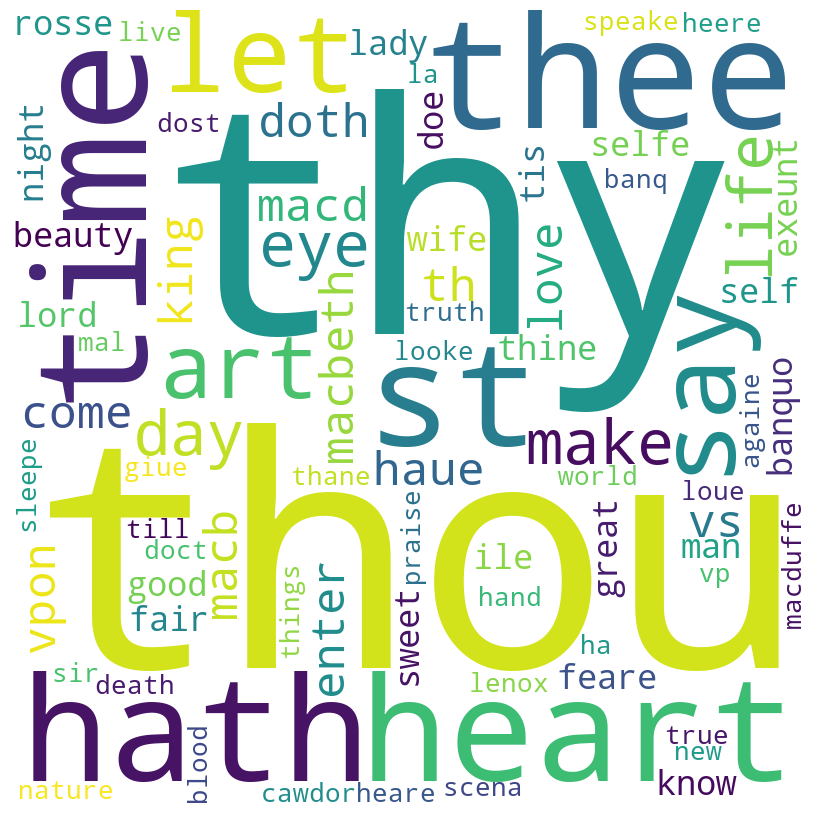

In [23]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()